In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [4]:
data = pd.get_dummies(data, drop_first=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


<Axes: title={'center': 'Correlated with charges'}>

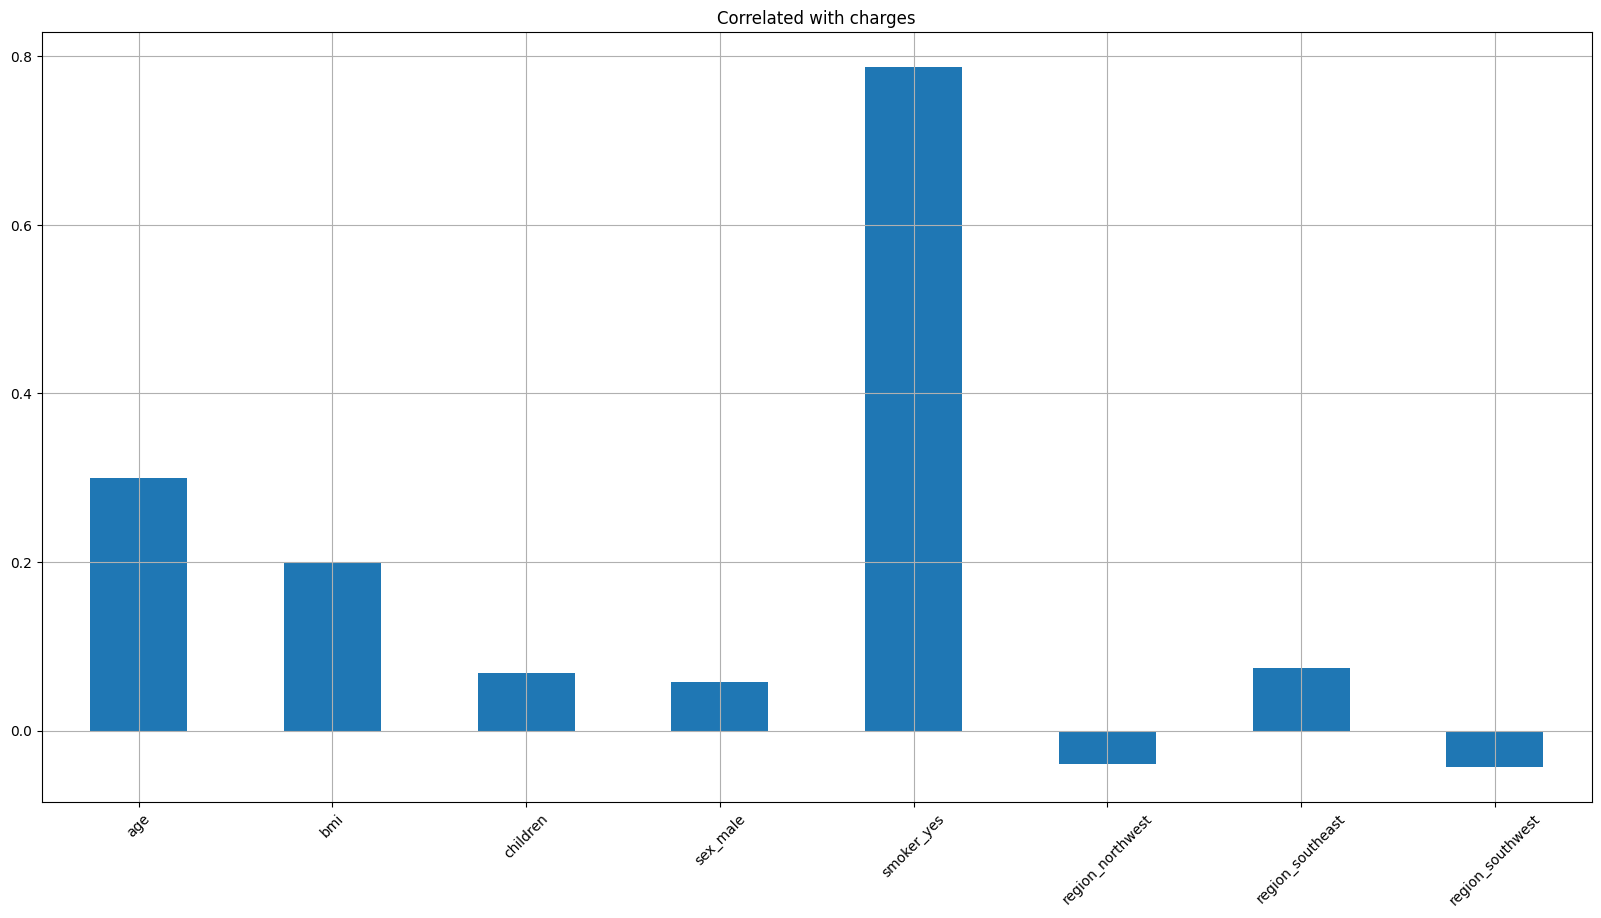

In [6]:
data2 = data.drop(columns='charges')

data2.corrwith(data['charges'],).plot.bar(figsize=(20,10), title="Correlated with charges", rot=45, grid=True)

In [7]:
x = data.drop(columns='charges')
y = data['charges']

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.7507204573325563

In [31]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
r2 = r2_score(y_pred, y_test)
r2

0.7868936091004037

## Support Vector Machine

In [80]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))

In [81]:
# from sympy.abc import y
svr = SVR(kernel='rbf', degree=3)
svr.fit(x_train, y_train)

/1tb/coding/PythonProjects/ML/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [84]:
y_pred = sc_y.inverse_transform(svr.predict(sc_x.transform(x_test)).reshape(-1, 1))
r2 = r2_score(y_test, y_pred)
r2

/1tb/coding/PythonProjects/ML/.venv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


-0.1547122098199296